In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/pokemon/

/content/drive/My Drive/pokemon


In [ ]:
!pip install ipython-autotime
%load_ext autotime

  Created wheel for ipython-autotime: filename=ipython_autotime-0.1-cp36-none-any.whl size=1831 sha256=24fdb215b30fcf96014fbd386f55572ed6fd03c86501c05c9e1a54eab9dda466
  Stored in directory: /root/.cache/pip/wheels/d2/df/81/2db1e54bc91002cec40334629bc39cfa86dff540b304ebcd6e
Successfully built ipython-autotime


In [ ]:
#Import lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical 

from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, Input,GlobalAveragePooling2D, Lambda
from keras.layers.experimental.preprocessing import Resizing
from keras.optimizers import RMSprop, Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
import keras.backend as k

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


time: 1.75 s


In [ ]:
name_dict={1: 'Bulbasaur', 2: 'Ivysaur', 3: 'Venusaur', 4: 'Charmander', 5: 'Charmeleon', 6: 'Charizard', 7: 'Squirtle', 8: 
          'Wartortle', 9: 'Blastoise', 10: 'Caterpie', 11: 'Metapod', 12: 'Butterfree', 13: 'Weedle', 14: 'Kakuna', 
          15: 'Beedrill', 16: 'Pidgey', 17: 'Pidgeotto', 18: 'Pidgeot', 19: 'Rattata', 20: 'Raticate', 21: 'Spearow',
          22: 'Fearow', 23: 'Ekans', 24: 'Arbok', 25: 'Pikachu', 26: 'Raichu', 27: 'Sandshrew', 28: 'Sandslash', 
          29: 'Nidoran F', 30: 'Nidorina', 31: 'Nidoqueen',32: 'Nidoran M', 33: 'Nidorino', 34: 'Nidoking', 35: 'Clefairy',
          36: 'Clefable', 37: 'Vulpix', 38: 'Ninetales', 39: 'Jigglypuff', 40: 'Wigglytuff', 41: 'Zubat', 42: 'Golbat', 
          43: 'Oddish', 44: 'Gloom', 45: 'Vileplume', 46: 'Paras', 47: 'Parasect', 48: 'Venonat', 49: 'Venomoth',
          50: 'Diglett', 51: 'Dugtrio', 52: 'Meowth', 53: 'Persian', 54: 'Psyduck',55: 'Golduck', 56: 'Mankey', 
          57: 'Primeape', 58: 'Growlithe', 59: 'Arcanine', 60: 'Poliwag', 61: 'Poliwhirl', 62: 'Poliwrath',
          63: 'Abra', 64: 'Kadabra', 65: 'Alakazam', 66: 'Machop', 67: 'Machoke', 68: 'Machamp', 69: 'Bellsprout', 
          70: 'Weepinbell', 71: 'Victreebel', 72: 'Tentacool', 73: 'Tentacruel', 74: 'Geodude', 75: 'Graveler',
          76: 'Golem', 77: 'Ponyta', 78: 'Rapidash', 79: 'Slowpoke', 80: 'Slowbro', 81: 'Magnemite', 82: 'Magneton',
          83: "Farfetch'd", 84: 'Doduo', 85: 'Dodrio', 86: 'Seel', 87: 'Dewgong', 88: 'Grimer', 89: 'Muk', 
          90: 'Shellder', 91: 'Cloyster', 92: 'Gastly', 93: 'Haunter', 94: 'Gengar', 95: 'Onix', 96: 'Drowzee',
          97: 'Hypno', 98: 'Krabby', 99: 'Kingler', 100: 'Voltorb', 101: 'Electrode', 102: 'Exeggcute', 103: 'Exeggutor', 
          104: 'Cubone', 105: 'Marowak', 106: 'Hitmonlee', 107: 'Hitmonchan', 108: 'Lickitung', 109: 'Koffing',
          110: 'Weezing', 111: 'Rhyhorn', 112: 'Rhydon', 113: 'Chansey', 114: 'Tangela', 115: 'Kangaskhan', 116: 'Horsea', 
          117: 'Seadra', 118: 'Goldeen', 119: 'Seaking', 120: 'Staryu', 121: 'Starmie', 122: 'Mr. Mime', 123: 'Scyther', 
          124: 'Jynx', 125: 'Electabuzz', 126: 'Magmar', 127: 'Pinsir', 128: 'Tauros', 129: 'Magikarp', 130: 'Gyarados', 
          131: 'Lapras', 132: 'Ditto', 133: 'Eevee', 134: 'Vaporeon', 135: 'Jolteon', 136: 'Flareon', 137: 'Porygon', 
          138: 'Omanyte', 139: 'Omastar', 140: 'Kabuto', 141: 'Kabutops', 142: 'Aerodactyl', 143: 'Snorlax', 144: 'Articuno',
          145: 'Zapdos', 146: 'Moltres', 147: 'Dratini', 148: 'Dragonair', 149: 'Dragonite', 150: 'Mewtwo', 'Bulbasaur': 1, 'Ivysaur': 2, 'Venusaur': 3, 'Charmander': 4, 'Charmeleon': 5, 'Charizard': 6, 'Squirtle': 7, 'Wartortle': 8, 'Blastoise': 9, 'Caterpie': 10, 'Metapod': 11, 'Butterfree': 12, 'Weedle': 13, 'Kakuna': 14, 'Beedrill': 15, 'Pidgey': 16, 'Pidgeotto': 17, 'Pidgeot': 18, 'Rattata': 19, 'Raticate': 20, 'Spearow': 21, 'Fearow': 22, 'Ekans': 23, 'Arbok': 24, 'Pikachu': 25, 'Raichu': 26, 'Sandshrew': 27, 'Sandslash': 28, 'Nidoran F': 29, 'Nidorina': 30, 'Nidoqueen': 31, 'Nidoran M': 32, 'Nidorino': 33, 'Nidoking': 34, 'Clefairy': 35, 'Clefable': 36, 'Vulpix': 37, 'Ninetales': 38, 'Jigglypuff': 39, 'Wigglytuff': 40, 'Zubat': 41, 'Golbat': 42, 'Oddish': 43, 'Gloom': 44, 'Vileplume': 45, 'Paras': 46, 'Parasect': 47, 'Venonat': 48, 'Venomoth': 49, 'Diglett': 50, 'Dugtrio': 51, 'Meowth': 52, 'Persian': 53, 'Psyduck': 54, 'Golduck': 55, 'Mankey': 56, 'Primeape': 57, 'Growlithe': 58, 'Arcanine': 59, 'Poliwag': 60, 'Poliwhirl': 61, 'Poliwrath': 62, 'Abra': 63, 'Kadabra': 64, 'Alakazam': 65, 'Machop': 66, 'Machoke': 67, 'Machamp': 68, 'Bellsprout': 69, 'Weepinbell': 70, 'Victreebel': 71, 'Tentacool': 72, 'Tentacruel': 73, 'Geodude': 74, 'Graveler': 75, 'Golem': 76, 'Ponyta': 77, 'Rapidash': 78, 'Slowpoke': 79, 'Slowbro': 80, 'Magnemite': 81, 'Magneton': 82, 'Farfetch\'d': 83, 'Doduo': 84, 'Dodrio': 85, 'Seel': 86, 'Dewgong': 87, 'Grimer': 88, 'Muk': 89, 'Shellder': 90, 'Cloyster': 91, 'Gastly': 92, 'Haunter': 93, 'Gengar': 94, 'Onix': 95, 'Drowzee': 96, 'Hypno': 97, 'Krabby': 98, 'Kingler': 99, 'Voltorb': 100, 'Electrode': 101, 'Exeggcute': 102, 'Exeggutor': 103, 'Cubone': 104, 'Marowak': 105, 'Hitmonlee': 106, 'Hitmonchan': 107, 'Lickitung': 108, 'Koffing': 109, 'Weezing': 110, 'Rhyhorn': 111, 'Rhydon': 112, 'Chansey': 113, 'Tangela': 114, 'Kangaskhan': 115, 'Horsea': 116, 'Seadra': 117, 'Goldeen': 118, 'Seaking': 119, 'Staryu': 120, 'Starmie': 121, 'Mr. Mime': 122, 'Scyther': 123, 'Jynx': 124, 'Electabuzz': 125, 'Magmar': 126, 'Pinsir': 127, 'Tauros': 128, 'Magikarp': 129, 'Gyarados': 130, 'Lapras': 131, 'Ditto': 132, 'Eevee': 133, 'Vaporeon': 134, 'Jolteon': 135, 'Flareon': 136, 'Porygon': 137, 'Omanyte': 138, 'Omastar': 139, 'Kabuto': 140, 'Kabutops': 141, 'Aerodactyl': 142, 'Snorlax': 143, 'Articuno': 144, 'Zapdos': 145, 'Moltres': 146, 'Dratini': 147, 'Dragonair': 148, 'Dragonite': 149, 'Mewtwo': 150}

time: 29 ms


In [ ]:
original_df = pd.read_csv('300k.csv')
df = original_df[['pokemonId','latitude','longitude']]
df.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (49) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,pokemonId,latitude,longitude
0,16,20.525745,-97.460829
1,133,20.523695,-97.461167
2,16,38.903590,-77.199780
3,13,47.665903,-122.312561
4,133,47.666454,-122.311628


time: 8.83 s


In [ ]:
# Functions
def get_only(df, names):
  ids = []
  for name in names:
    ids.append(name_dict[name])
  df_temp = df[df.pokemonId.isin(ids)]
  df_temp.reset_index(drop=True, inplace=True)
  return df_temp

time: 3.24 ms


In this task, one will consider only the spawn rate of 3 pokemons. 'Diglett', 'Seel', and 'Tauros'

In [ ]:
names = ['Diglett','Seel','Tauros'] # index 0 1 2
df = get_only(df,names)

data_dict = {}
for index, name in enumerate(names):
  print(name)
  temp = name_dict[name]
  data_dict[temp] = index
df['pokemonName'] = df['pokemonId'].map(name_dict)
df['pokemonId'] = df['pokemonId'].map(data_dict)

df.head()

Diglett
Seel
Tauros


,pokemonId,latitude,longitude,pokemonName
0,0,49.146199,-122.638105,Diglett
1,2,44.476769,-73.212749,Tauros
2,2,39.767486,-86.161068,Tauros
3,1,49.999197,9.066973,Seel
4,0,25.724382,-100.379311,Diglett


time: 32.4 ms


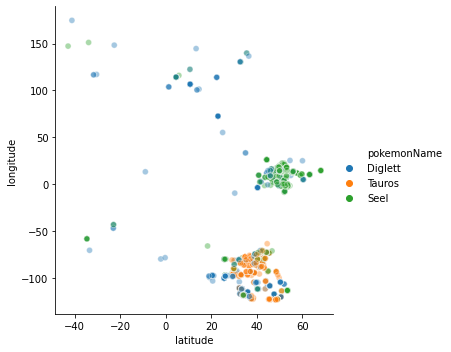

time: 508 ms


In [ ]:
sns.relplot(x="latitude", y="longitude", hue="pokemonName",kind="scatter",palette="tab10", alpha = 0.4, data = df)

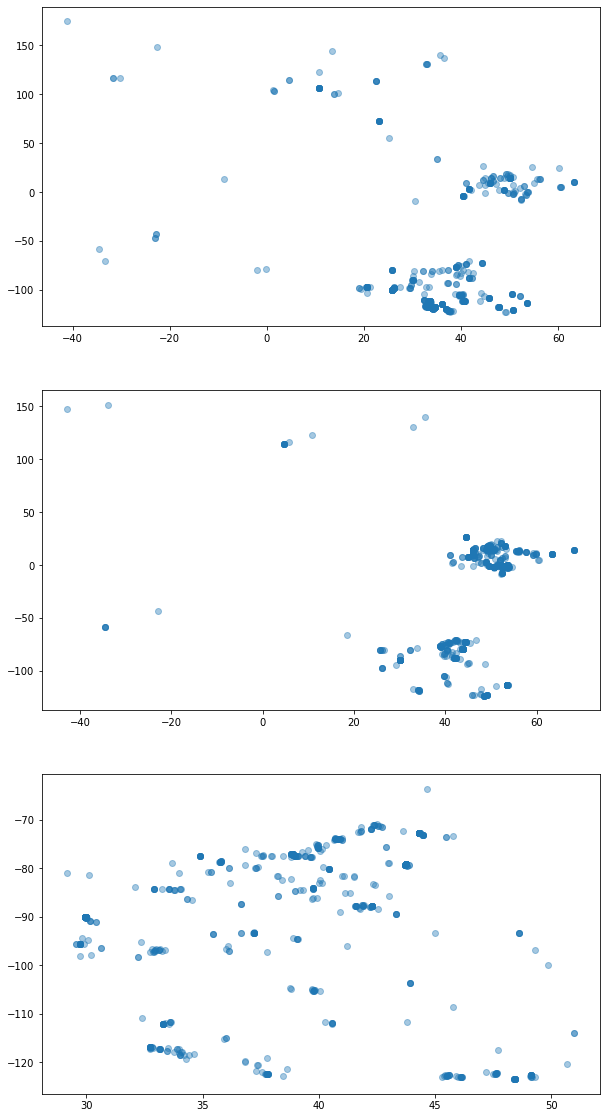

time: 384 ms


In [ ]:
fig, axes =plt.subplots(3,figsize=(10,20))

for index, name in enumerate(names):
  temp = df[df.pokemonName == name]
  axes[index].set_title('')
  axes[index].scatter(x=temp.latitude,y=temp.longitude,alpha=0.4)

plt.show()

In [ ]:
y = df['pokemonId']
print(y[0:4])
y = to_categorical(y, num_classes = 3)
print(y[0:4])
X = df[['latitude','longitude']].to_numpy()
print(X[0:4,:])

0    0
1    2
2    2
3    1
Name: pokemonId, dtype: int64
[[1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]]
[[  49.146199 -122.638105]
 [  44.476769  -73.212749]
 [  39.767486  -86.161068]
 [  49.999197    9.066973]]
time: 8.95 ms


In [ ]:
max_lat = max(abs(X[:,0]))
max_long = max(abs(X[:,1]))

X[:,0] = X[:,0]/max_lat
X[:,1] = X[:,1]/max_long

time: 4.36 ms


In [ ]:
# split 0.7 0.1 0.2 train val test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=44) 

time: 4.62 ms


In [ ]:
#Model 1

model_1 = Sequential()


model_1.add(Dense(20,activation ='relu',input_shape = (1,2)))
model_1.add(Dense(30, activation = "relu"))
# model_1.add(Dropout(0.5))
#
model_1.add(Dense(100, activation = "relu"))
model_1.add(Dense(100, activation = "relu"))
model_1.add(Dense(100, activation = "relu"))
#
model_1.add(Dense(30, activation = "relu"))
# model_1.add(Dropout(0.5))
model_1.add(Dense(20, activation = "relu"))
model_1.add(Dropout(0.5))
model_1.add(Dense(10, activation = "relu"))
model_1.add(Dropout(0.5))
model_1.add(Dense(3, activation = "softmax"))

optimizer = Adam(learning_rate=0.001)

model_1.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

model_1.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_80 (Dense)             (None, 1, 20)             60        
_________________________________________________________________
dense_81 (Dense)             (None, 1, 30)             630       
_________________________________________________________________
dense_82 (Dense)             (None, 1, 100)            3100      
_________________________________________________________________
dense_83 (Dense)             (None, 1, 100)            10100     
_________________________________________________________________
dense_84 (Dense)             (None, 1, 100)            10100     
_________________________________________________________________
dense_85 (Dense)             (None, 1, 30)             3030      
_________________________________________________________________
dense_86 (Dense)             (None, 1, 20)           

In [ ]:
mc = ModelCheckpoint('best_model_1.h5', monitor='val_loss', mode='min', save_best_only= True, verbose=1)

time: 1.3 ms


In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=5, 
                                            verbose=1, 
                                            factor=0.8, 
                                            min_lr=0.00001)

time: 1.1 ms


In [ ]:
#train model 
epochs = 100
batch_size = 4
history_1 = model_1.fit(X_train, y_train, validation_data=(X_val,y_val), epochs=epochs, batch_size=batch_size, callbacks=[learning_rate_reduction, mc])
model_1.save("last_model_1.h5")

Epoch 1/100
364/375 [============================>.] - ETA: 0s - loss: 1.0966 - accuracy: 0.3043WARNING:tensorflow:Model was constructed with shape (None, 1, 2) for input Tensor("dense_80_input:0", shape=(None, 1, 2), dtype=float32), but it was called on an input with incompatible shape (None, 2).

Epoch 00001: val_loss improved from inf to 1.08037, saving model to best_model_1.h5
375/375 [==============================] - 1s 3ms/step - loss: 1.0964 - accuracy: 0.3089 - val_loss: 1.0804 - val_accuracy: 0.4850
Epoch 2/100
367/375 [============================>.] - ETA: 0s - loss: 1.0367 - accuracy: 0.4530
Epoch 00002: val_loss improved from 1.08037 to 0.95275, saving model to best_model_1.h5
375/375 [==============================] - 1s 3ms/step - loss: 1.0378 - accuracy: 0.4543 - val_loss: 0.9528 - val_accuracy: 0.5210
Epoch 3/100
362/375 [===========================>..] - ETA: 0s - loss: 1.0159 - accuracy: 0.4945
Epoch 00003: val_loss improved from 0.95275 to 0.93605, saving model to 

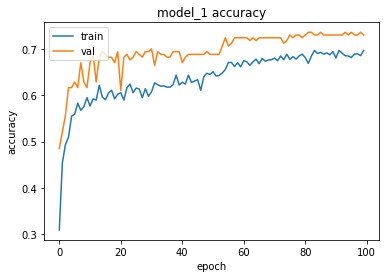

time: 138 ms


In [ ]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('model_1 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
# model_1.load_weights('last_model_1.h5')
model_1.load_weights('best_model_1.h5')

score, acc = model_1.evaluate(X_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

105/105 [==============================] - 0s 2ms/step - loss: 0.7283 - accuracy: 0.7050
Test score: 0.7282881736755371
Test accuracy: 0.7050359845161438
time: 744 ms
